### Import Libraries and Load Data For country comparsion 

Importing important libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from scipy import stats
import os
from scipy.stats import zscore

# Load dataset
df_benin = pd.read_csv("C:/Users/ssss/Desktop/@@10/data/benin_clean.csv")
df_sierraleone = pd.read_csv("C:/Users/ssss/Desktop/@@10/data/sierraleone_clean.csv")
df_togo = pd.read_csv("C:/Users/ssss/Desktop/@@10/data/togo_clean.csv") 

In [4]:
df_togo.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModB,Comments,GHI_zscore,DNI_zscore,DHI_zscore,ModA_zscore,ModB_zscore,WS_zscore,WSgust_zscore,is_zscore_outlier
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-1.003710,-1.131165,False
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.866974,-0.865570,False
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808,False
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.865570,False
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.730237,-0.865570,False
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,...,24.5,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808,False
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,...,24.5,NaN,-0.718239,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808,False
7,2021-10-25 00:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,...,24.5,NaN,-0.718239,-0.602727,-0.743956,-0.71261,-0.713042,-0.866974,-0.971808,False
8,2021-10-25 00:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,...,24.5,NaN,-0.718239,-0.602727,-0.743956,-0.71261,-0.713042,-0.935342,-0.971808,False
9,2021-10-25 00:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,...,24.5,NaN,-0.718239,-0.602727,-0.743956,-0.71261,-0.713042,-1.003710,-0.971808,False


### 1. Metric Comparison

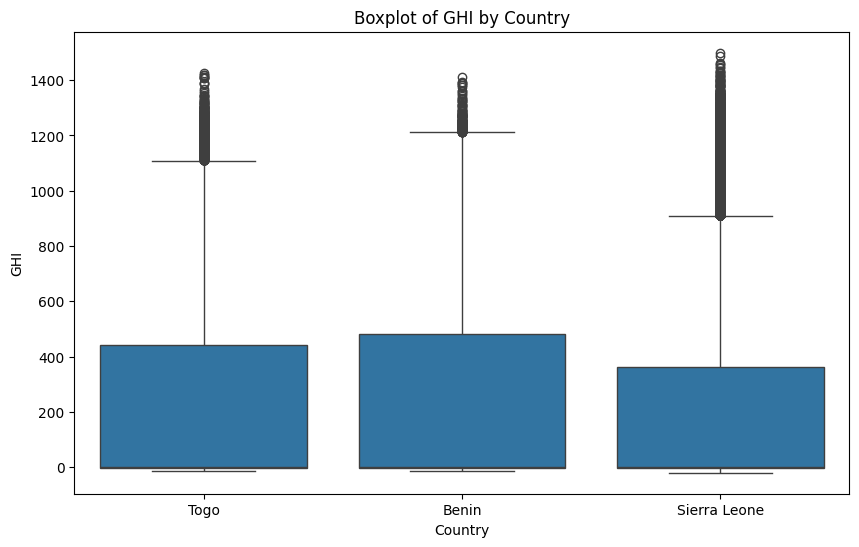

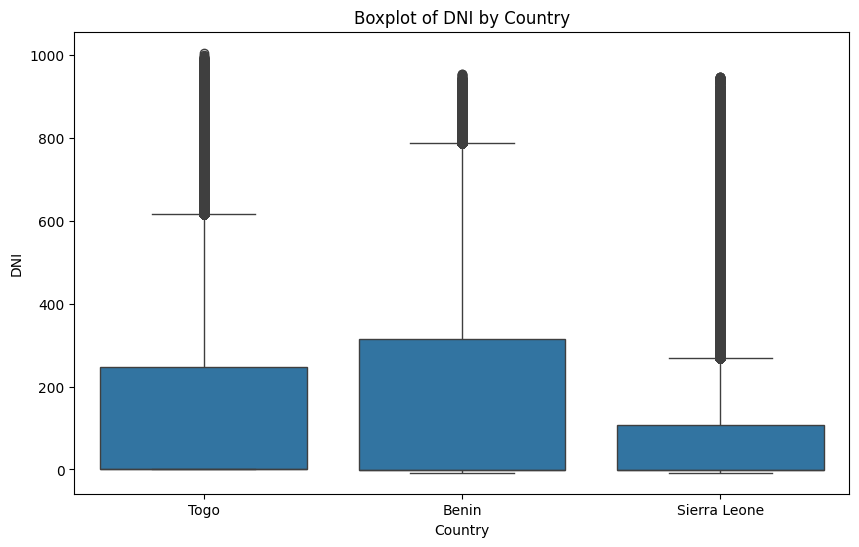

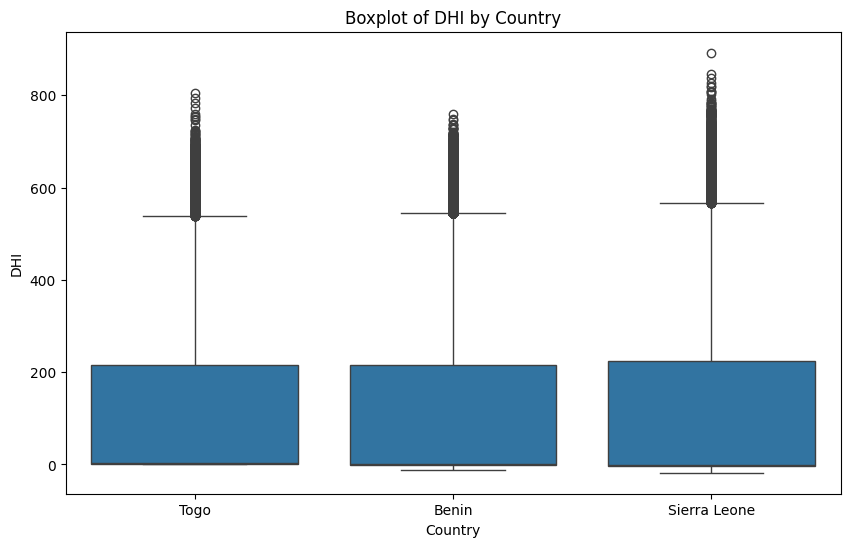

In [3]:
# Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country)
# Create a new column 'country' to identify the source of each row

df_togo['country'] = 'Togo'
df_benin['country'] = 'Benin'
df_sierraleone['country'] = 'Sierra Leone'
df_combined = pd.concat([df_togo, df_benin, df_sierraleone])
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='country', y=metric, data=df_combined)
    plt.title(f'Boxplot of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.show()

In [5]:
# Summary table: mean, median, std of GHI, DNI, DHI by country
summary_table = df_combined.groupby('country')[metrics].agg(['mean', 'median'])
summary_table


GHI                DNI                DHI       
                    mean median        mean median        mean median
country                                                              
Benin         240.559452    1.8  167.187516   -0.1  115.358961    1.6
Sierra Leone  201.957515    0.3  116.376337   -0.1  113.720571   -0.1
Togo          230.555040    2.1  151.258469    0.0  116.444352    2.5

### Statistical Testing (optional but recommended)


In [7]:
# Run a one-way ANOVA (or Kruskal–Wallis) on GHI values to assess whether differences between countries are significant.
# Briefly note p-values.
# Perform one-way ANOVA for GHI
countries = df_combined['country'].unique()
groups = [df_combined[df_combined['country'] == country]['GHI'] for country in countries]

# Check if any group is empty before performing the ANOVA test
if all(len(group) > 0 for group in groups):
    f_statistic, p_value_anova = stats.f_oneway(*groups)
    print(f"One-way ANOVA on GHI:")
    print(f"  F-statistic: {f_statistic:.4f}")
    print(f"  P-value: {p_value_anova:.4f}")

    # Note the p-value for ANOVA
    if p_value_anova < 0.05:
        print("  The differences in GHI between countries are statistically significant (p < 0.05).")
    else:
        print("  The differences in GHI between countries are not statistically significant (p >= 0.05).")
else:
    print("One or more groups are empty, skipping ANOVA test.")

    # Perform Kruskal-Wallis test for GHI (non-parametric alternative)
if all(len(group) > 0 for group in groups):
    h_statistic, p_value_kruskal = stats.kruskal(*groups)
    print(f"\nKruskal-Wallis test on GHI:")
    print(f"  H-statistic: {h_statistic:.4f}")
    print(f"  P-value: {p_value_kruskal:.4f}")

    # Note the p-value for Kruskal-Wallis
    if p_value_kruskal < 0.05:
        print("  The differences in GHI between countries are statistically significant (p < 0.05).")
    else:
        print("  The differences in GHI between countries are not statistically significant (p >= 0.05).")
else:
    print("One or more groups are empty, skipping Kruskal-Wallis test.")


One-way ANOVA on GHI:
  F-statistic: 2090.0929
  P-value: 0.0000
  The differences in GHI between countries are statistically significant (p < 0.05).

Kruskal-Wallis test on GHI:
  H-statistic: 4524.8835
  P-value: 0.0000
  The differences in GHI between countries are statistically significant (p < 0.05).


### Key Observations


A markdown cell with 3 bullet points summarizing what stands out (e.g., “Country X shows highest median GHI but also greatest variability”).


Benin had the highest average and median GHI, indicating strong potential for grid-tied PV systems.


Togo exhibited consistent GHI with moderate variability, suggesting it may be suited for hybrid systems.


Sierra Leone had the lowest GHI, impacted by high relative humidity and cloud cover, making it a candidate for storage-focused or thermal-based systems.

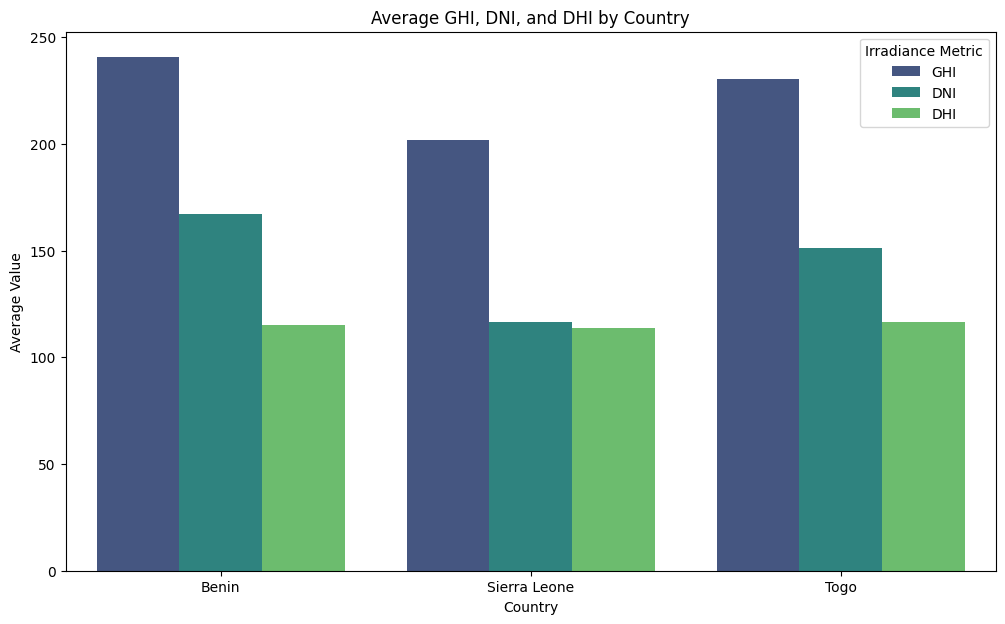

In [8]:
# A small bar chart ranking countries by EACH  average GHI,DNI, DHI

# Calculate the mean for each metric by country
mean_summary = df_combined.groupby('country')[metrics].mean().reset_index()

# Melt the DataFrame for easy plotting with seaborn
mean_summary_melted = mean_summary.melt(id_vars='country', var_name='Metric', value_name='Mean Value')

# Create a bar plot for the average of each metric by country
plt.figure(figsize=(12, 7))
sns.barplot(x='country', y='Mean Value', hue='Metric', data=mean_summary_melted, palette='viridis')
plt.title('Average GHI, DNI, and DHI by Country')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.legend(title='Irradiance Metric')
plt.show()